In [ ]:
from keras.applications import vgg16

img_rows, img_cols= 224, 224

vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (img_rows, img_cols,3))
#freeze fc layers
#layers are set to trainables as True by defualt
for layer in vgg.layers:
  layer.trainable = False

#print layers
for(i, layer) in enumerate(vgg.layers):
  print(str(i)+" "+layer.__class__.__name__, layer.trainable)

def lw(bottom_model, num_classes):
  """create top layer that will be placed on buttom layer"""
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation = 'relu')(top_model)
  top_model = Dense(1024, activation = 'relu')(top_model)
  top_model = Dense(num_classes, activation = 'softmax')(top_model)

  # Create the final model
  model = Model(inputs=bottom_model.input, outputs=top_model)
  return model


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization
from keras.models import Model

num_classes = 2

FC_Head = lw(vgg, num_classes)

print(FC_Head.summary())

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 16,291,650 (62.15 MB)

 Trainable params: 1,576,962 (6.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import os

def convert_pgm_to_rgb_jpg(src_folder, dest_folder):
    # Loop through each folder in the source directory
    for subdir in os.listdir(src_folder):
        subdir_path = os.path.join(src_folder, subdir)
        if os.path.isdir(subdir_path):
            # Create a corresponding directory in the destination folder
            os.makedirs(os.path.join(dest_folder, subdir), exist_ok=True)
            for file in os.listdir(subdir_path):
                # Only process .pgm files
                if file.endswith('.pgm'):
                    # Open the .pgm image
                    img = Image.open(os.path.join(subdir_path, file))
                    # Convert the grayscale image to RGB (3 channels)
                    img = img.convert('RGB')
                    # Save the converted image as .jpg
                    img.save(os.path.join(dest_folder, subdir, file.replace('.pgm', '.jpg')))

# Specify the source folder (your original 'train' folder) and destination folder
src_folder = '/content/drive/MyDrive/train/'
dest_folder = '/content/drive/MyDrive/train_rgb/'

# Run the conversion function
convert_pgm_to_rgb_jpg(src_folder, dest_folder)


In [ ]:
from PIL import Image
import os

def convert_pgm_to_rgb_jpg(src_folder, dest_folder):
    # Loop through each folder in the source directory
    for subdir in os.listdir(src_folder):
        subdir_path = os.path.join(src_folder, subdir)
        if os.path.isdir(subdir_path):
            # Create a corresponding directory in the destination folder
            os.makedirs(os.path.join(dest_folder, subdir), exist_ok=True)
            for file in os.listdir(subdir_path):
                # Only process .pgm files
                if file.endswith('.pgm'):
                    # Open the .pgm image
                    img = Image.open(os.path.join(subdir_path, file))
                    # Convert the grayscale image to RGB (3 channels)
                    img = img.convert('RGB')
                    # Save the converted image as .jpg
                    img.save(os.path.join(dest_folder, subdir, file.replace('.pgm', '.jpg')))

# Specify the source folder (your original 'train' folder) and destination folder
src_folder = '/content/drive/MyDrive/val/'
dest_folder = '/content/drive/MyDrive/val_rgb/'

# Run the conversion function
convert_pgm_to_rgb_jpg(src_folder, dest_folder)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/My Drive/train_jpg'
validation_data_dir = '/content/drive/My Drive/val_rgb'

#augmentation

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')


Found 8 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


Traing again to build vgg model by transfere learning

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('/content/face recognition.h5',
                             monitor = "val_loss",
                             mode = "min",
                             save_best_only = True,
                             verbose = 1)

earlystopping = EarlyStopping(monitor = "val_loss",
                              min_delta = 0,

                              patience = 3,
                              verbose = 1,
                              restore_best_weights = True)

callbacks = [earlystopping, checkpoint]

FC_Head.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 16

# #Training
FC_Head.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=callbacks)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7500 - loss: 0.6818
Epoch 1: val_loss improved from inf to 0.38584, saving model to /content/face recognition.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.7500 - loss: 0.6818 - val_accuracy: 0.8333 - val_loss: 0.3858
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.3188
Epoch 2: val_loss did not improve from 0.38584
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.3188 - val_accuracy: 0.5000 - val_loss: 6.0816
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5000 - loss: 6.2717
Epoch 3: val_loss did not improve from 0.38584
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 6.2717 - val_accuracy: 0.5000 - val_loss: 0.8876
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5000 - loss: 0.7477
Epoch 4: val_loss did not improve from 0.38584
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.7477 - val_accuracy: 0.5000 - val_loss: 1.4843
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


Folder found: /content/drive/MyDrive/test
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


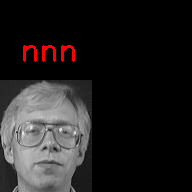

In [ ]:
from keras.models import load_model
from keras.optimizers import RMSprop
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile, join

# Load the model
classifier = load_model('/content/face recognition.h5')

# Recompile the model after loading it (important)
classifier.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.001),
                   metrics=['accuracy'])

# Prediction dictionary
monkey_breeds_dict = {"[0]": "ok", "[1]": "nnn"}

# Function to draw the result on the image
def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0, 0, 0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100, cv2.BORDER_CONSTANT, value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2_imshow(expanded_image)

# Function to load a random image from subdirectories in the test folder
def getRandomImage(path):
    """function loads a random image from a random subdirectory in the test path"""
    try:
        subdirectories = [d for d in listdir(path) if os.path.isdir(join(path, d))]

        if len(subdirectories) == 0:
            print("No subdirectories found in the specified directory.")
            return None

        # Pick a random subdirectory
        random_subdir = np.random.choice(subdirectories)
        subdir_path = join(path, random_subdir)  # Get the path of the subdirectory

        # Get the list of image files in the subdirectory
        files = [f for f in listdir(subdir_path) if isfile(join(subdir_path, f))]

        if len(files) == 0:
            print(f"No image files found in subdirectory {random_subdir}")
            return None

        # Pick a random image file
        random_image = np.random.choice(files)
        image_path = join(subdir_path, random_image)  # Build the full image path
        image = cv2.imread(image_path)         # Read the image
        if image is None:
            print(f"Error: Could not read image {random_image}")
            return None
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# Path to the test folder
test_path = "/content/drive/MyDrive/test"

# Check if the folder exists and list files for debugging
if os.path.exists(test_path):
    print(f"Folder found: {test_path}")
else:
    print(f"Folder not found at path: {test_path}")

# Load a random image from the test folder
test_image = getRandomImage(test_path)

# If an image was loaded
if test_image is not None:
    # Resize the image to match the model's input size (assuming 224x224)
    test_image_resized = cv2.resize(test_image, (224, 224))
    test_image_resized = np.expand_dims(test_image_resized, axis=0)  # Add batch dimension

    # Make predictions
    predictions = classifier.predict(test_image_resized)

    # Get the predicted class index
    pred_class = np.argmax(predictions, axis=1)

    # Draw the result on the image
    draw_test(test_image, pred_class, test_image)
else:
    print("No image was found to process.")

